In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis

The main purpose of this section is to see whether there is a difference in hashtag use between fake and true tweets to begin with.

In [2]:
fake = pd.read_csv("./data/Fake.csv")
real = pd.read_csv("./data/True.csv")

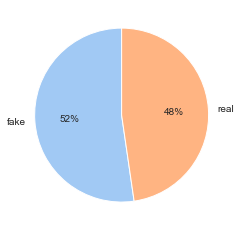

[23481, 21417]


In [3]:
size = [len(fake), len(real)]
colors = sns.color_palette('pastel')[0:2]
plt.pie(size, labels = ['fake','real'], colors=colors, startangle=90, autopct='%.0f%%')
plt.show()

print(size)

The balance is quite even. There are 2% more fake tweets than real tweets.

In [4]:
# add column with the hashtag count for a row. This will enable us to create a histogram
fake['hashtag_count'] = fake['text'].str.count('#')
real['hashtag_count'] = real['text'].str.count('#')

In [5]:
print('Hashtag count in fake:' + str(fake['hashtag_count'].sum()))
print('Hashtag count in real:' + str(real['hashtag_count'].sum()))

Hashtag count in fake:8191
Hashtag count in real:442


There is an order of magnitude difference in the use of hashtags, so further investigation is justified.

In [6]:
print('Max hashtag count in fake:' + str(fake['hashtag_count'].max()))
print('Max hashtag count in real:' + str(real['hashtag_count'].max()))

Max hashtag count in fake:53
Max hashtag count in real:13


The fake tweets have a high maximum in the use of hashtags. This could be an outlier, so let's look at the frequency table:'

In [7]:
freq_fake = fake.groupby('hashtag_count').size()
print(freq_fake)

hashtag_count
0     20341
1      1529
2       695
3       343
4       182
5       104
6        74
7        41
8        32
9        27
10       18
11       17
12        7
13       10
14        8
15       14
16       11
17        4
18        2
19        2
21        2
22        2
23        1
24        3
25        3
26        1
27        3
29        2
35        2
53        1
dtype: int64


The fake tweets frequency table seems to have a long tail, but 53 may indeed be seen as an outlier. However, as we will remove the hashtags in the modified datasets, we chose to leave it in.

In [9]:
# which one is it anyway?
outlier_df = fake[fake['hashtag_count'] > 35]
outlier_df.head()

,title,text,subject,date,hashtag_count
601,#TrumpChicken Is Now Trending And These Tweet...,"Earlier today, CBS News and other outlets noti...",News,"August 9, 2017",53


According to MS Word, this tweet has 644 words. There is an additional outlier cleaning step in the notebook fake_news_lstm, which caps the total word size after tokenization to 700.

It is possible that this one is culled (depending on how word2vec actually works), but we cannot be sure. Either way, we do not expect a serious negative effect of this one

Do the same for the real tweets

In [51]:
freq_true = real.groupby('hashtag_count').size()
print(freq_true)

hashtag_count
0     21175
1       158
2        41
3        19
4        10
5         3
6         3
7         2
8         1
9         3
10        1
13        1
dtype: int64


The true tweets also show a long tail, and 13 does not really look like an outlier, so we leave it in

<Axes: xlabel='hashtag_count', ylabel='Count'>

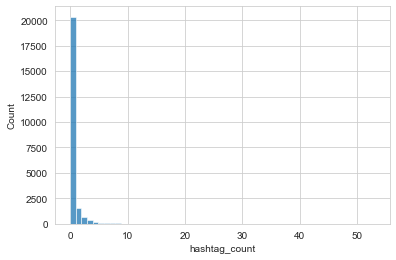

In [52]:
# the vast majority of the tweets do not carry a hashtag, which makes a histogram a little obscure.
# For the report, better use the frequency table
sns.histplot(data=fake, x= 'hashtag_count', bins=54)

<Axes: xlabel='hashtag_count', ylabel='Count'>

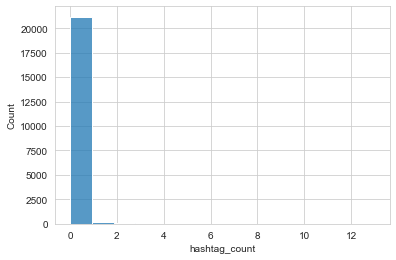

In [53]:
# same for the true dataset.
sns.histplot(data=real, x='hashtag_count', bins=14)